# Project Car Price Forecasting with Deep Learning

Tujuan dari project ini adalah membuat model prediksi harga mobil berdasarkan variabel independent yang ada. Model ini akan digunakan oleh manajemen untuk memahami bagaimana harga dapat bervariasi sejalan dengan perubahan berbagai variabel independen. Secara bisnis, perusahaan akan menggunakan informasi ini untuk merekayasa disain dari kendaraan, pola promosi, dan lain-lain untuk memenuhi kriteria harga.

# 1. Data Preview

In [1]:
'''Import Library'''

import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Use numpy to convert to arrays
import numpy as np
import seaborn as sns 
# Import tools needed for visualization
import pydot
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

In [2]:
df = pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacman Data Science\\Project\\Deep Learning/CarPrice_Assignment.csv')



In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 2. Data Preprocessing

Pada bagian ini dilakukan data preprocessing untuk mengecek duplikasi, missing data, dan statistik deskriptif

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.shape

(205, 26)

In [6]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
for x in df.select_dtypes(include=['object']).columns.tolist():
    print(df[x].value_counts(),'\n\n')

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64 


fueltype
gas       185
diesel     20
Name: count, dtype: int64 


aspiration
std      168
turbo     37
Name: count, dtype: int64 


doornumber
four    115
two      90
Name: count, dtype: int64 


carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64 


drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64 


enginelocation
front    202
rear       3
Name: count, dtype: int64 


enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64 


cylindernumber
four      159
six        24
five       11
eight     

In [11]:
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# 3. Exploratory Data Analysis (EDA)

Pada bagian ini dilakukan visualisasi dari berbagai variabel, baik yang numerical maupun categorical, serta analisa korelasi

In [12]:
# create a function to visualize the numerical columns
def histogram(column):
    # Set a pleasing color palette
    sns.set_palette("viridis")

    # Create a figure and axes
    plt.figure(figsize=(10, 6))

    # Plot the histogram with KDE
    sns.histplot(data=df[column], bins=10, kde=True, color='green', edgecolor='black')

    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

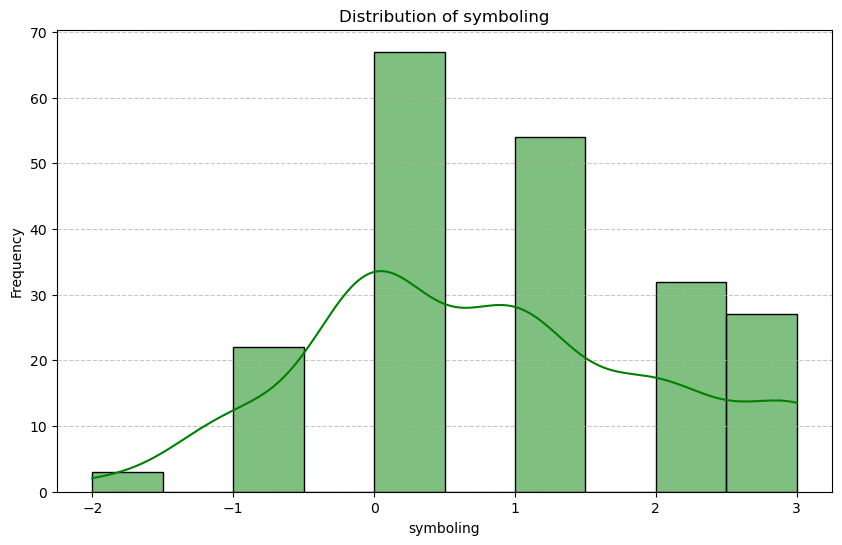

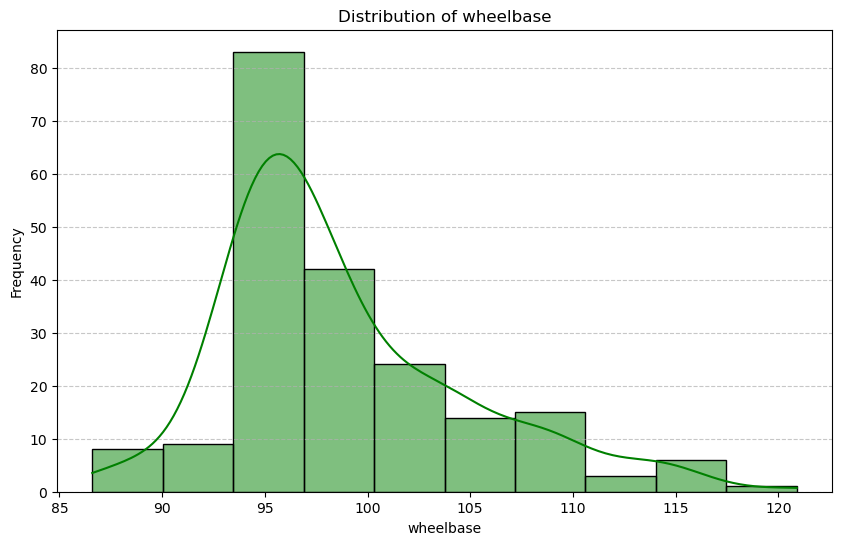

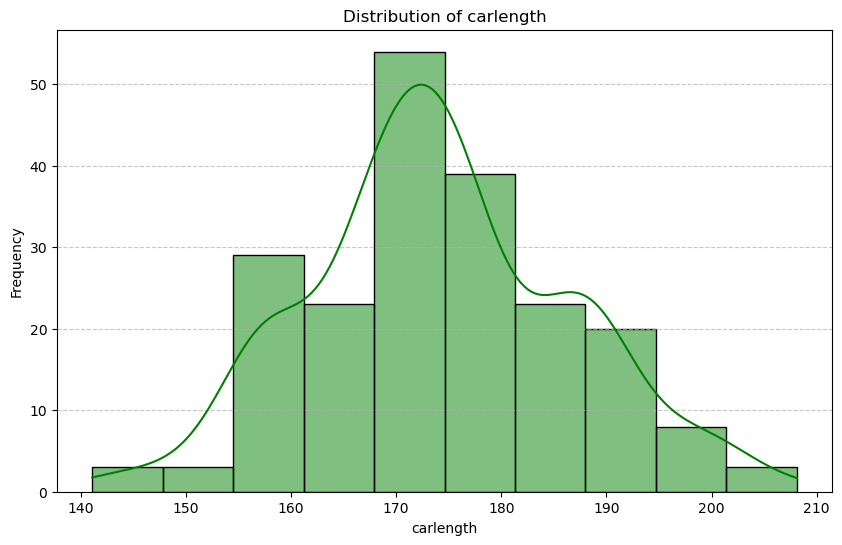

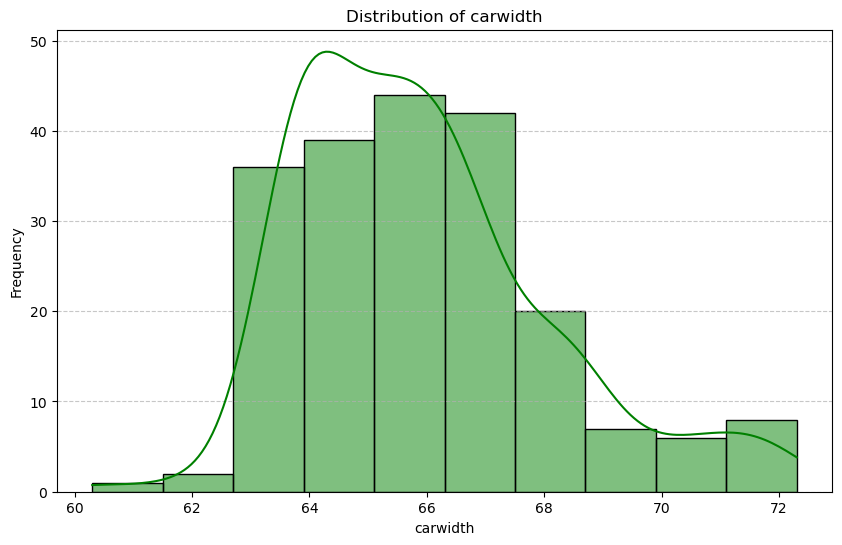

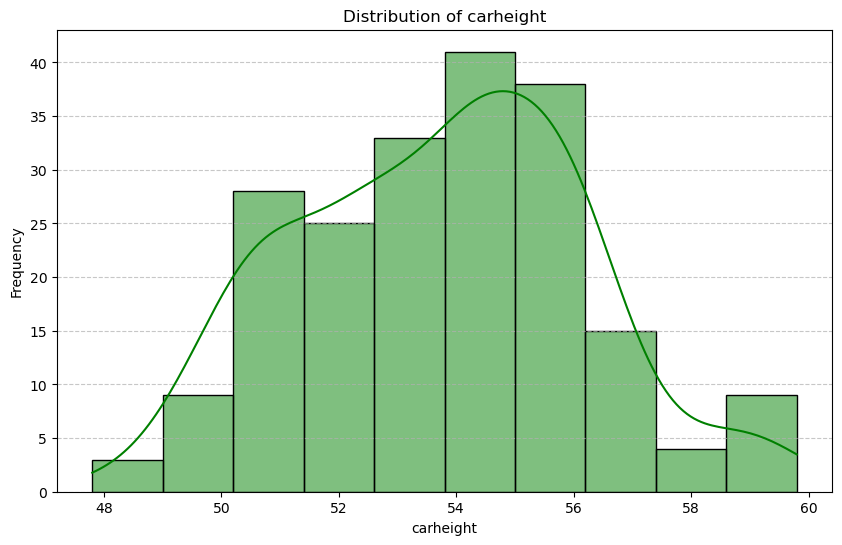

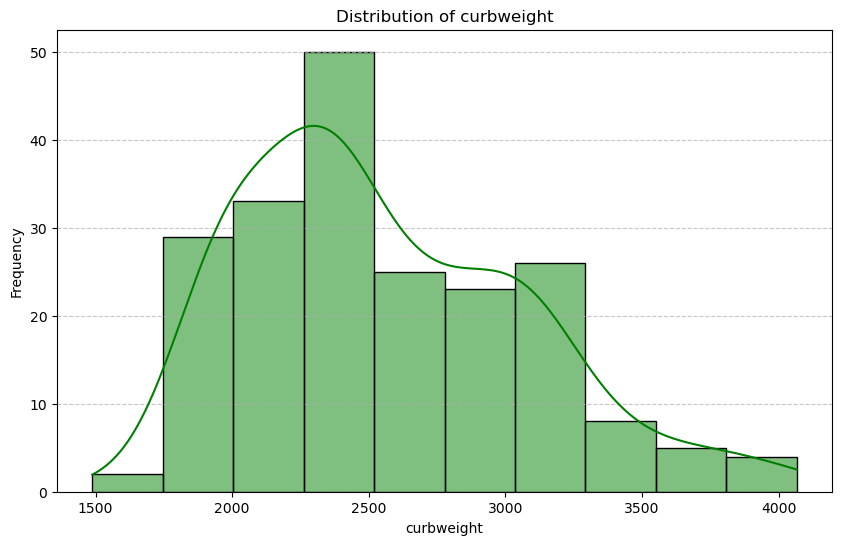

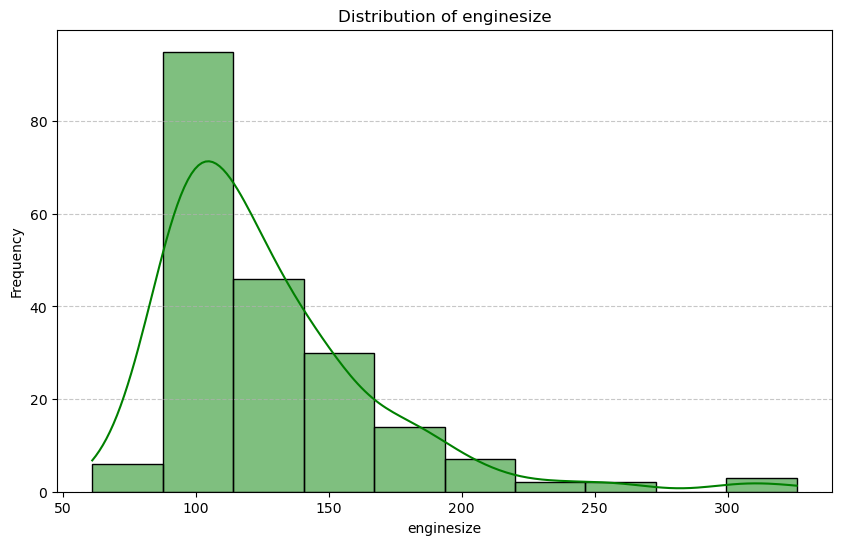

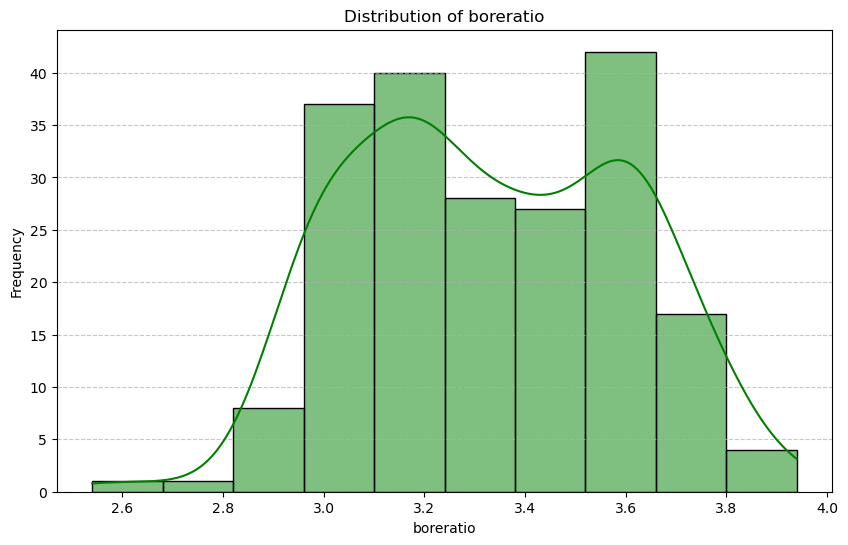

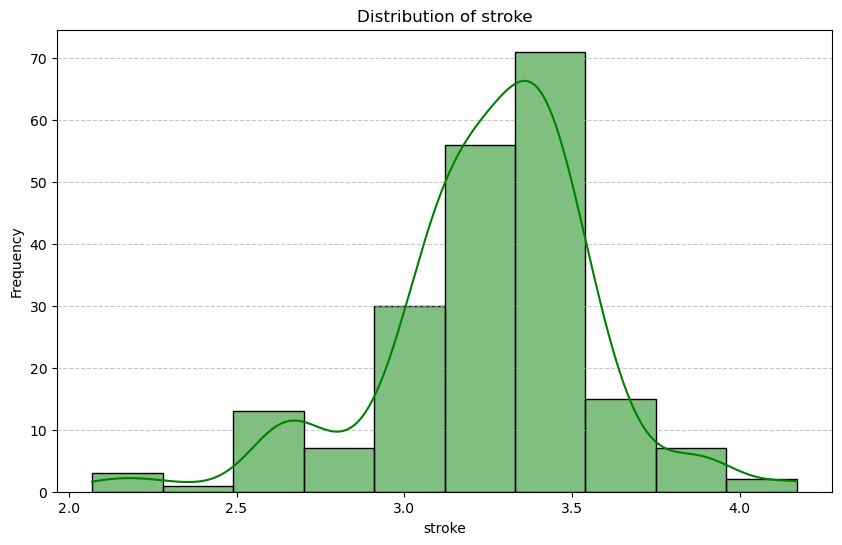

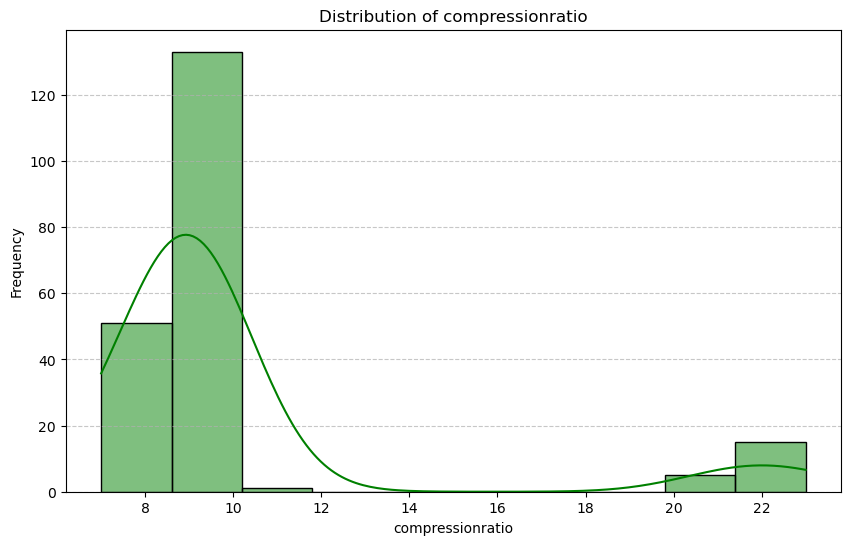

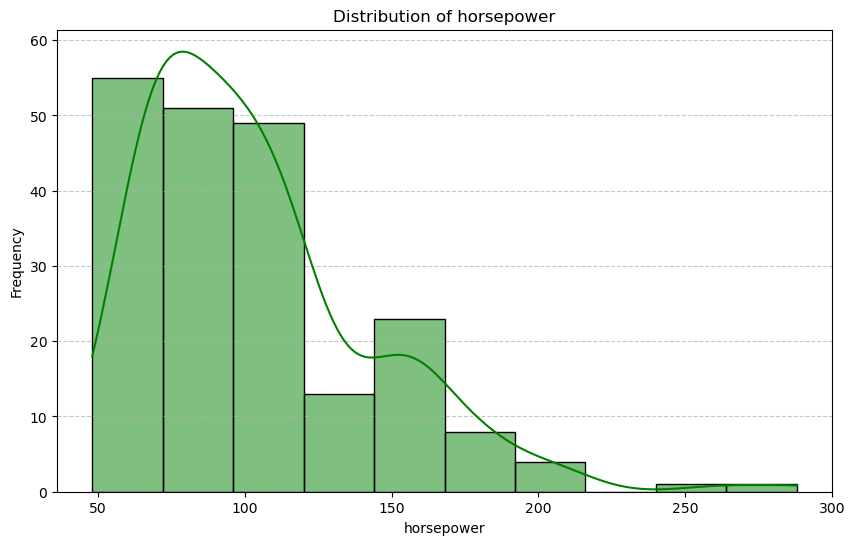

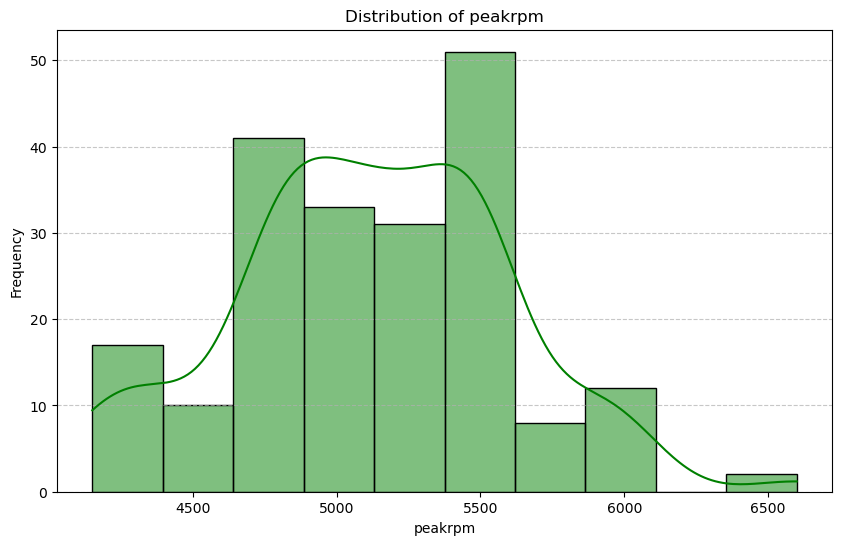

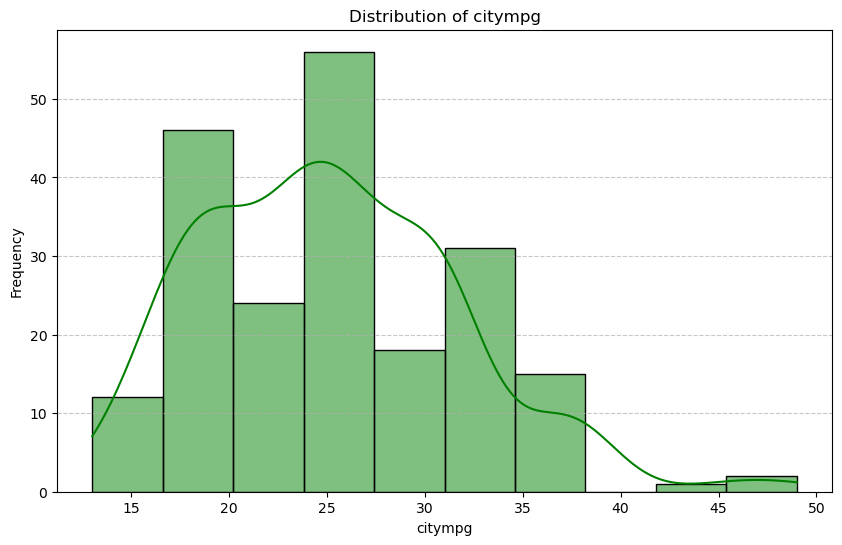

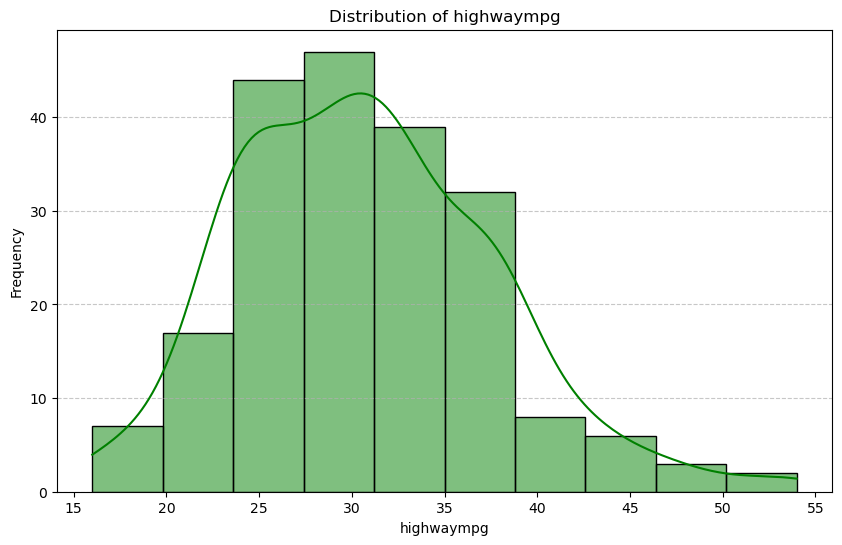

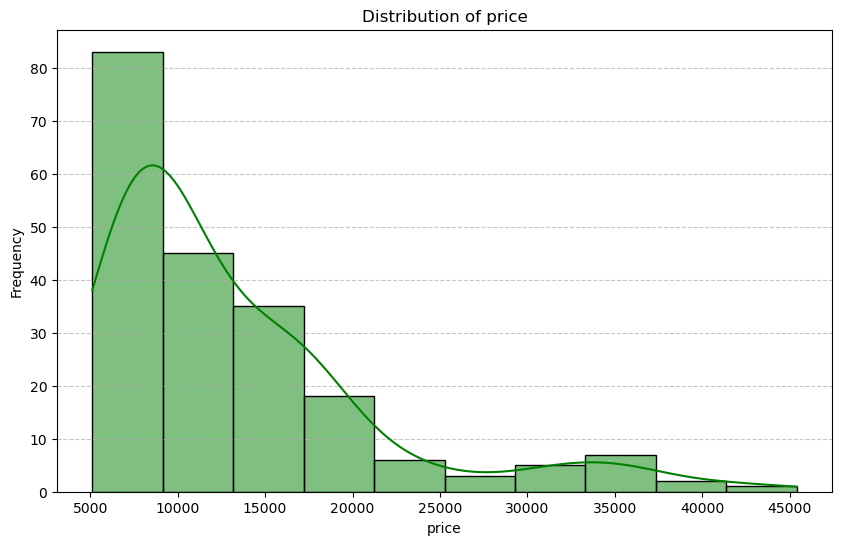

In [13]:
for x in df.select_dtypes(include=['int64','float64']).columns.tolist()[1:]:
    histogram(x)

In [14]:
# create a function to visualize the categrical columns
def count_plot(column):
    # Set a pleasing color palette
    sns.set_palette("Set2")

    # Create a figure and axes
    plt.figure(figsize=(12, 8))

    # Plot the count plot with adjusted bar width and edge color
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette="viridis",
                  edgecolor='black', linewidth=1.2)

    # Add labels and title with increased font size
    plt.title(f'Count Plot - {column}', fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Rotate x-axis labels and adjust font size for better readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add a horizontal grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

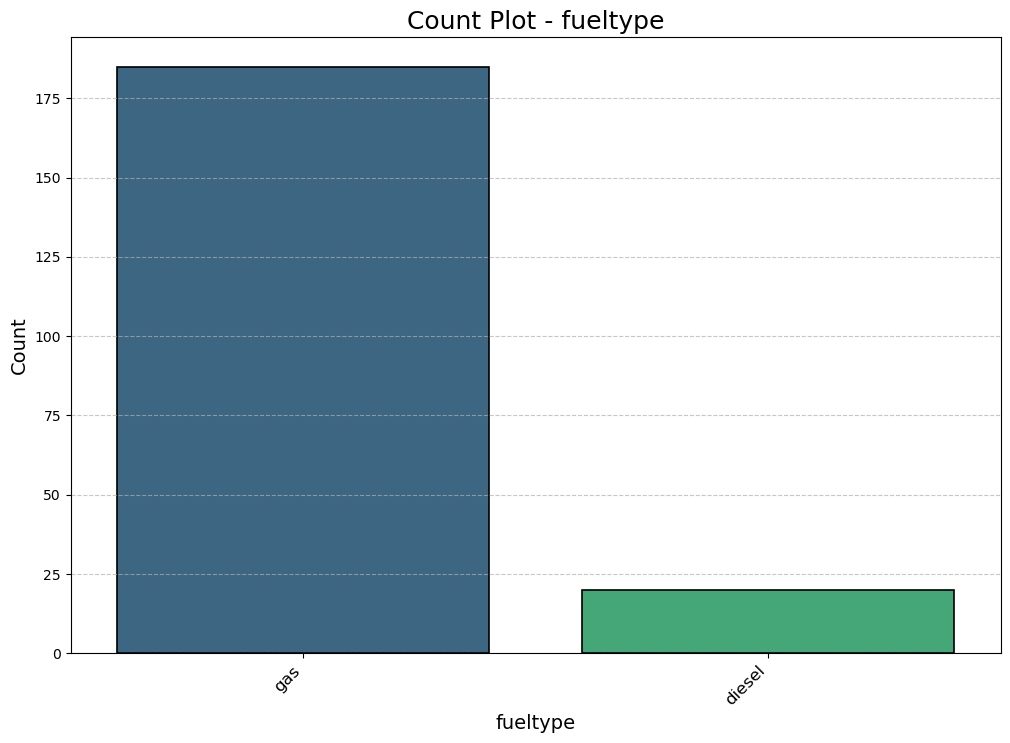

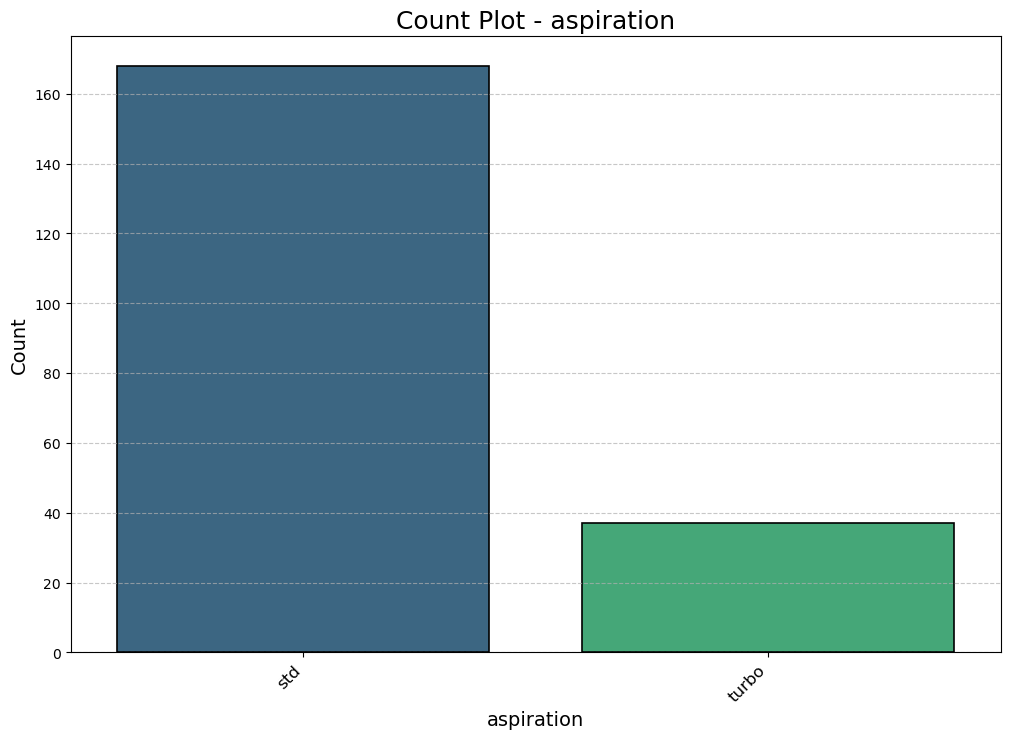

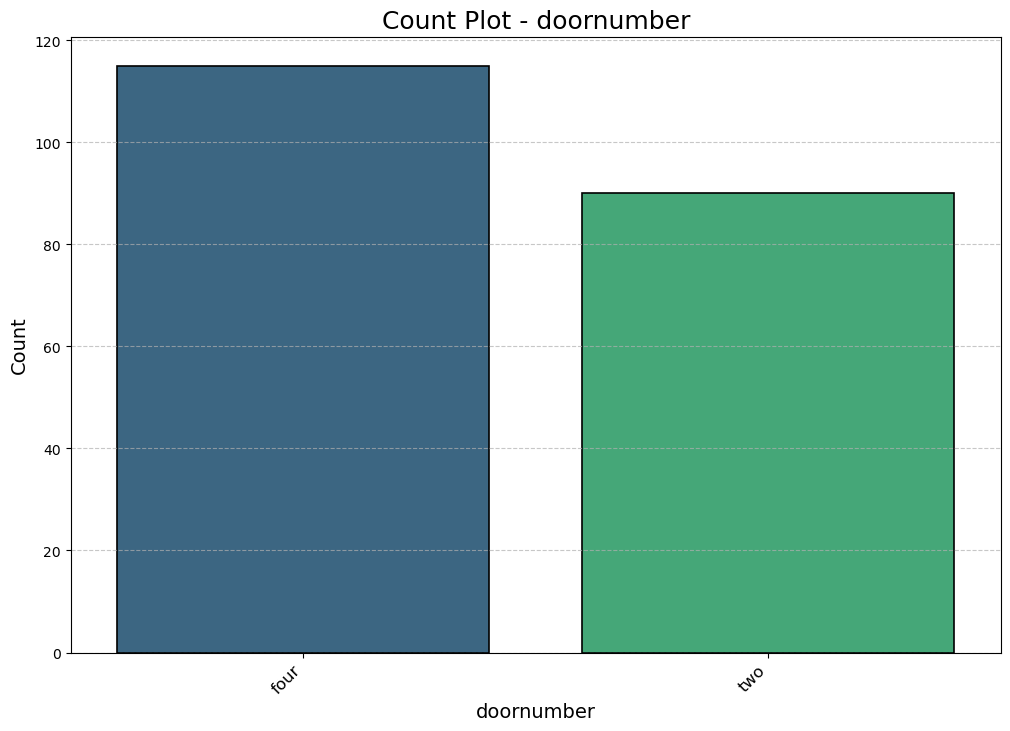

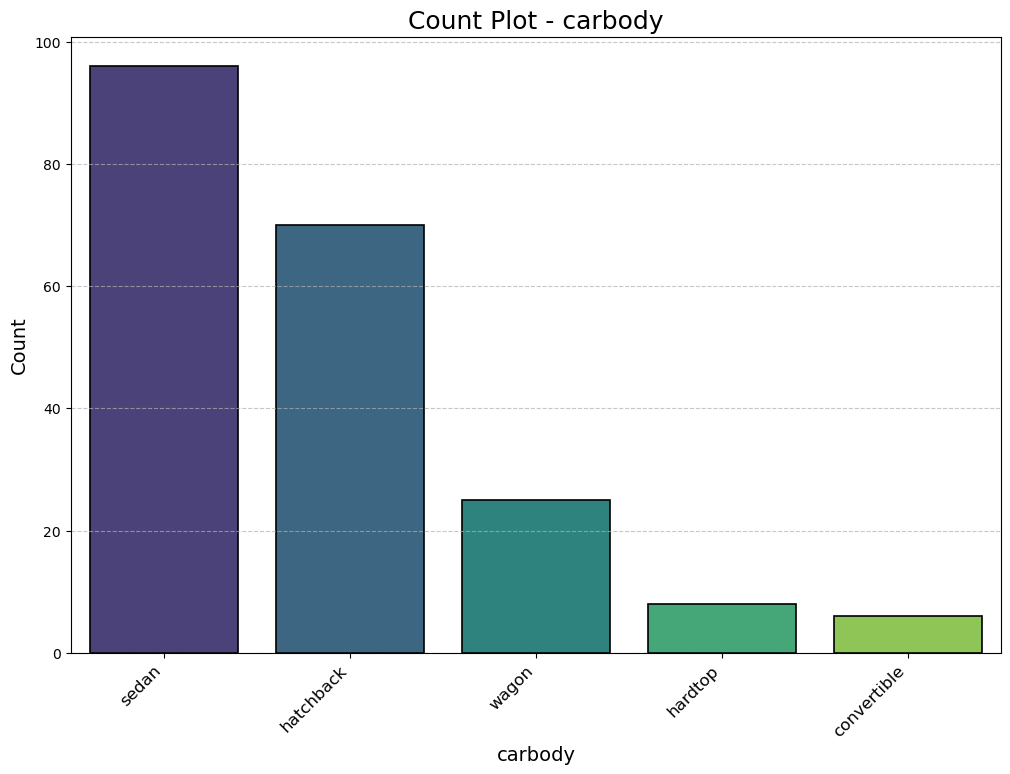

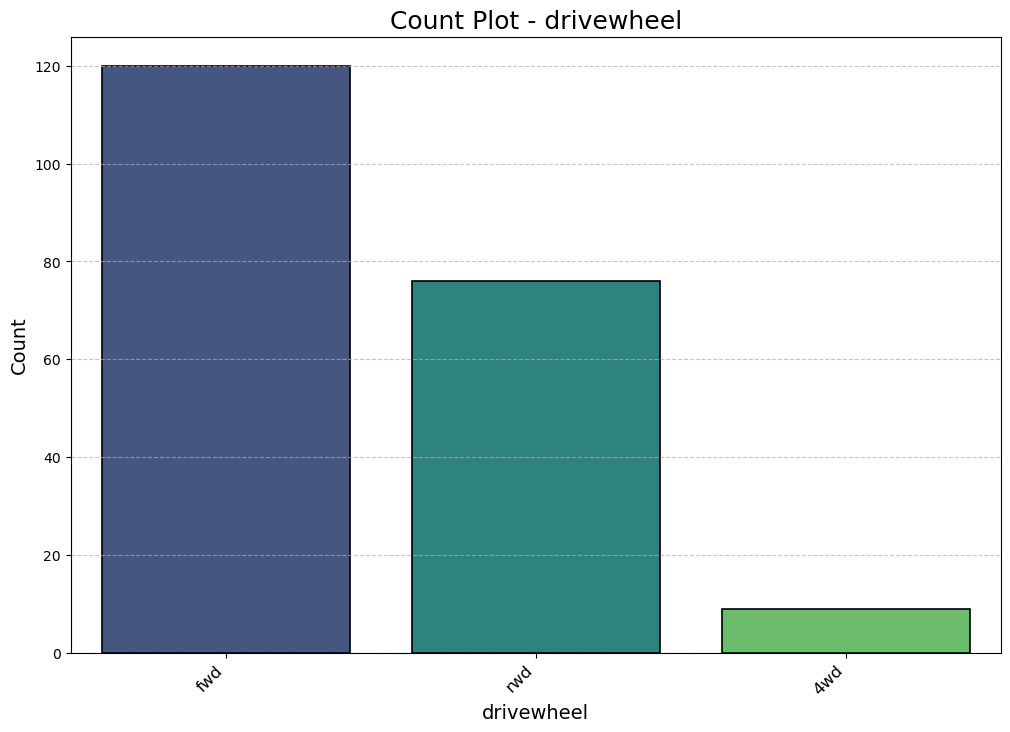

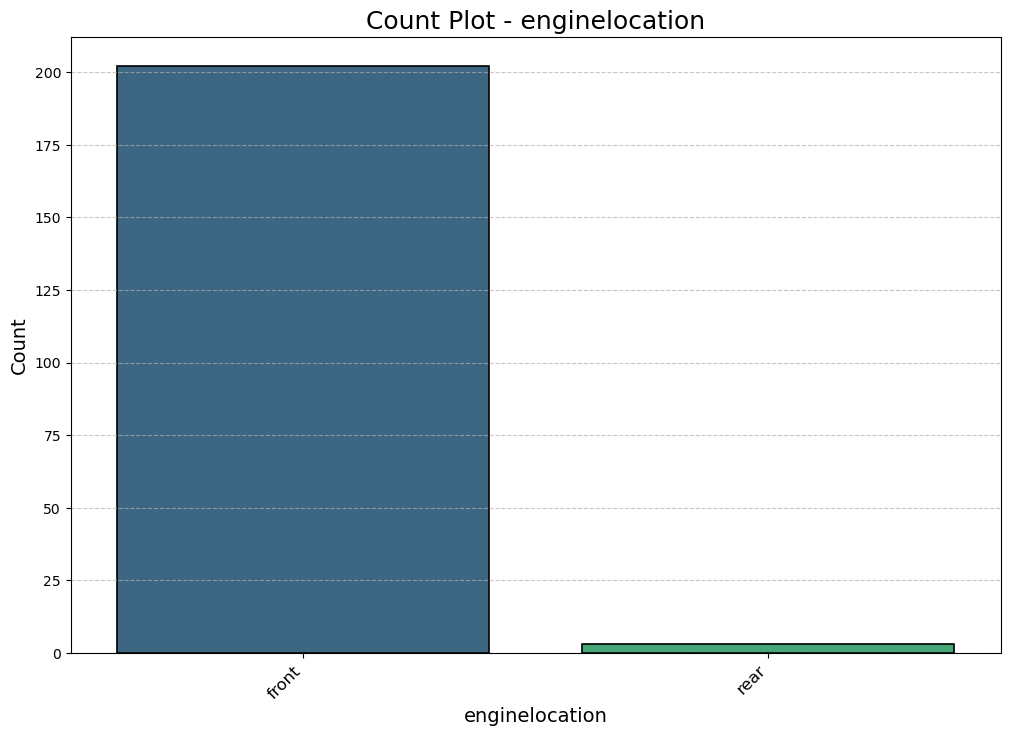

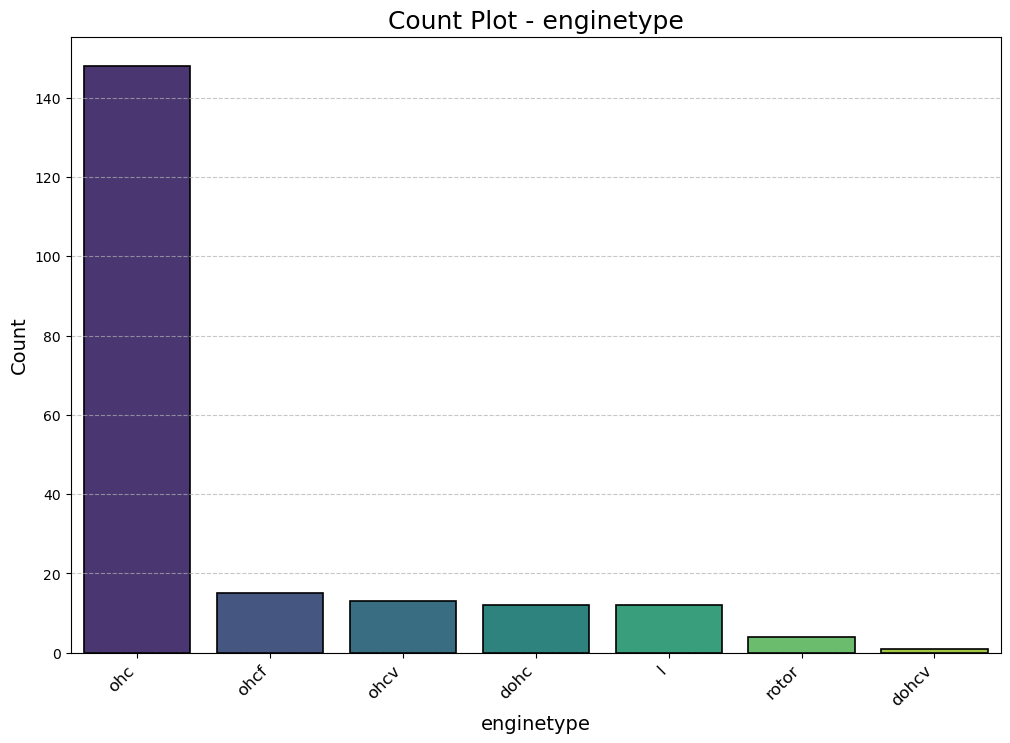

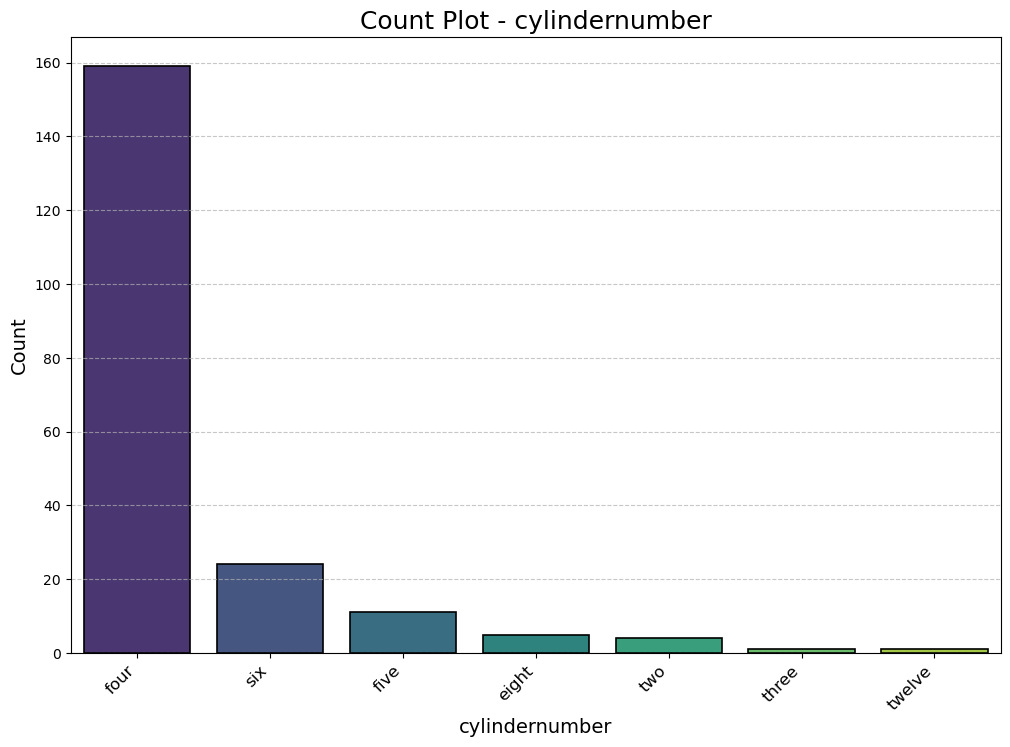

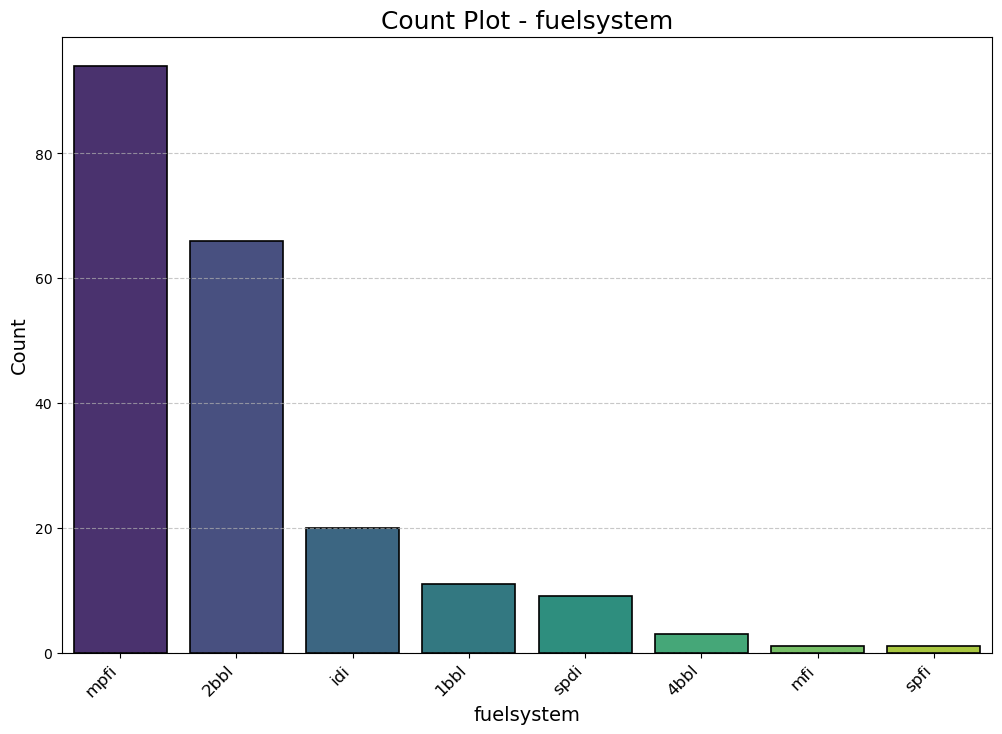

In [15]:
for x in df.select_dtypes(include=['object']).columns.tolist()[1:]:
    count_plot(x)

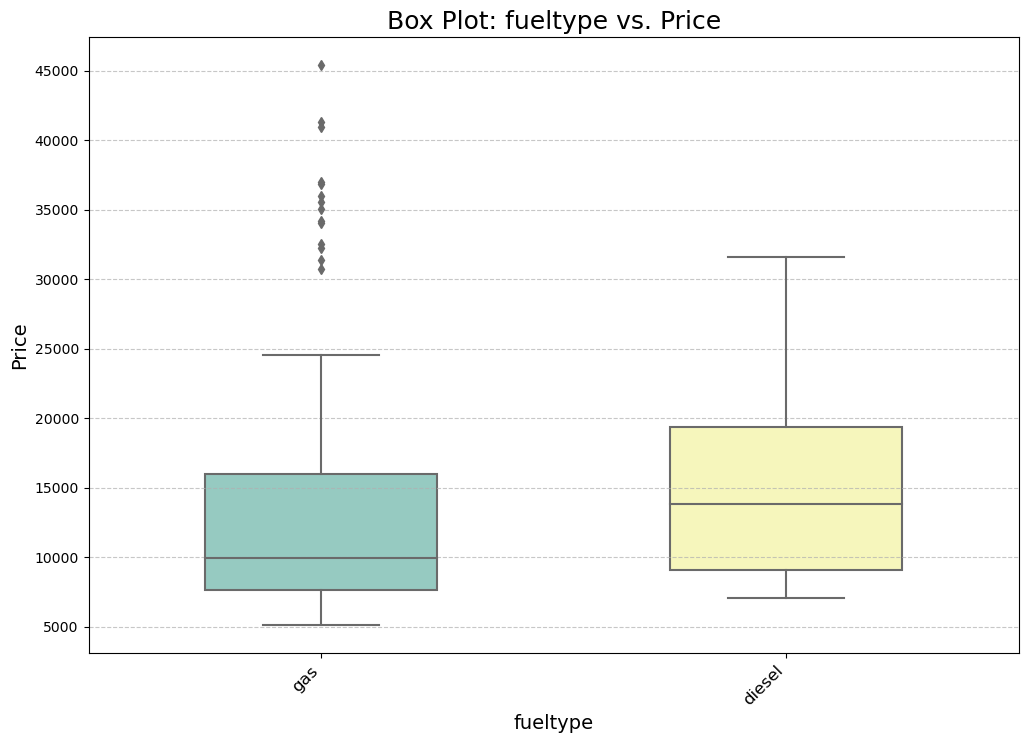

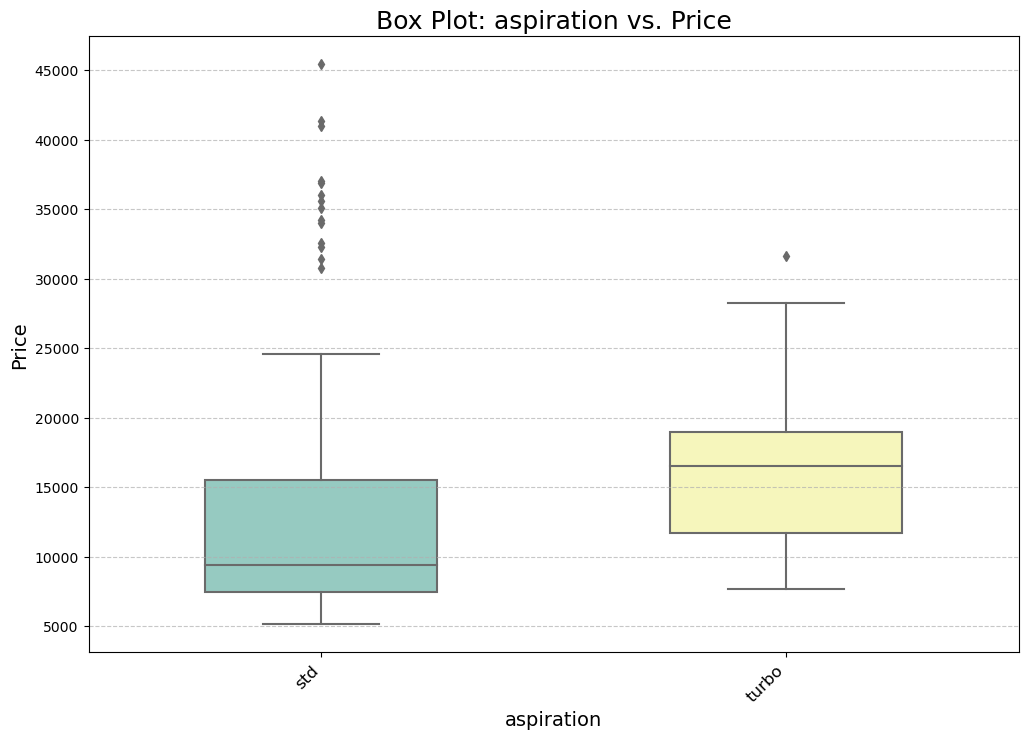

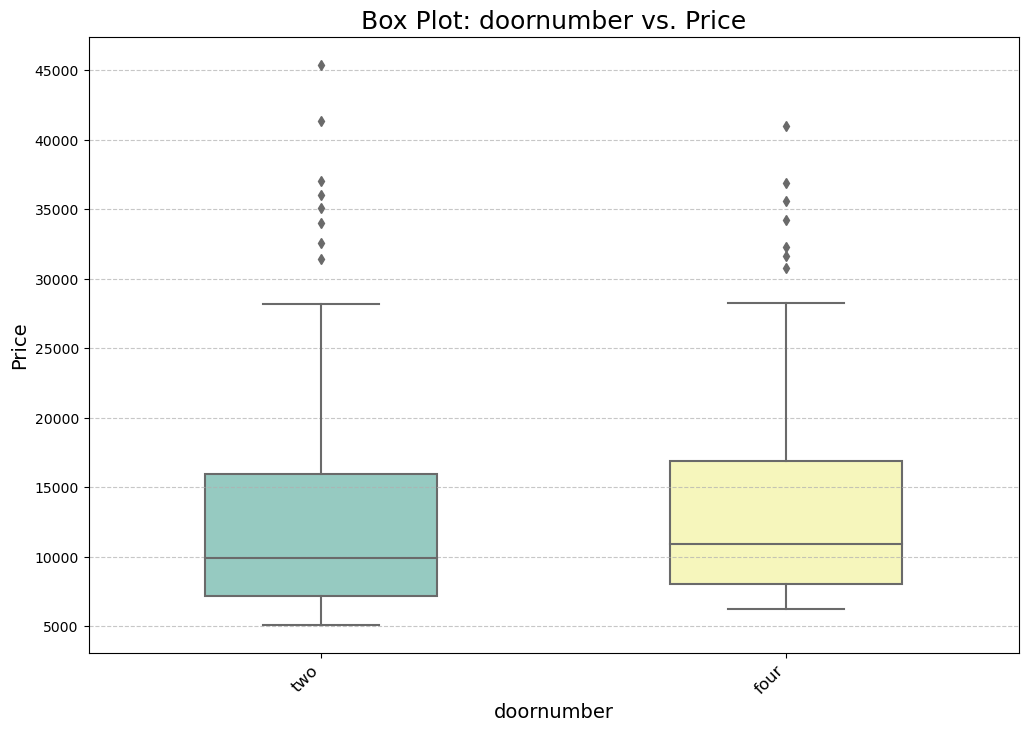

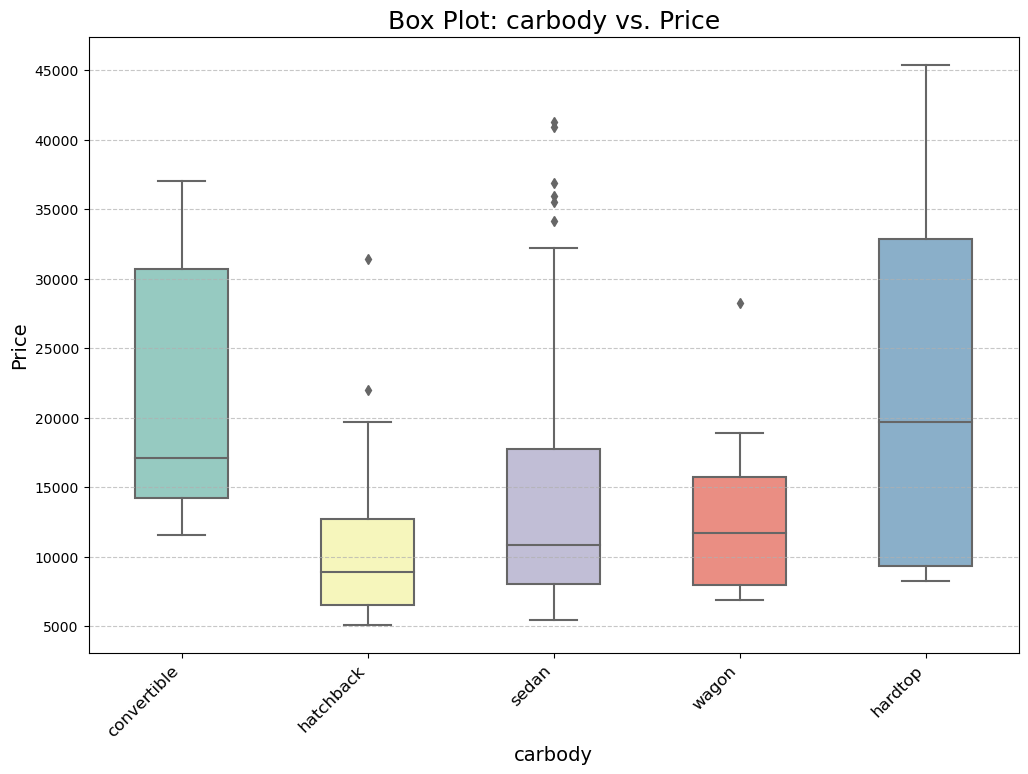

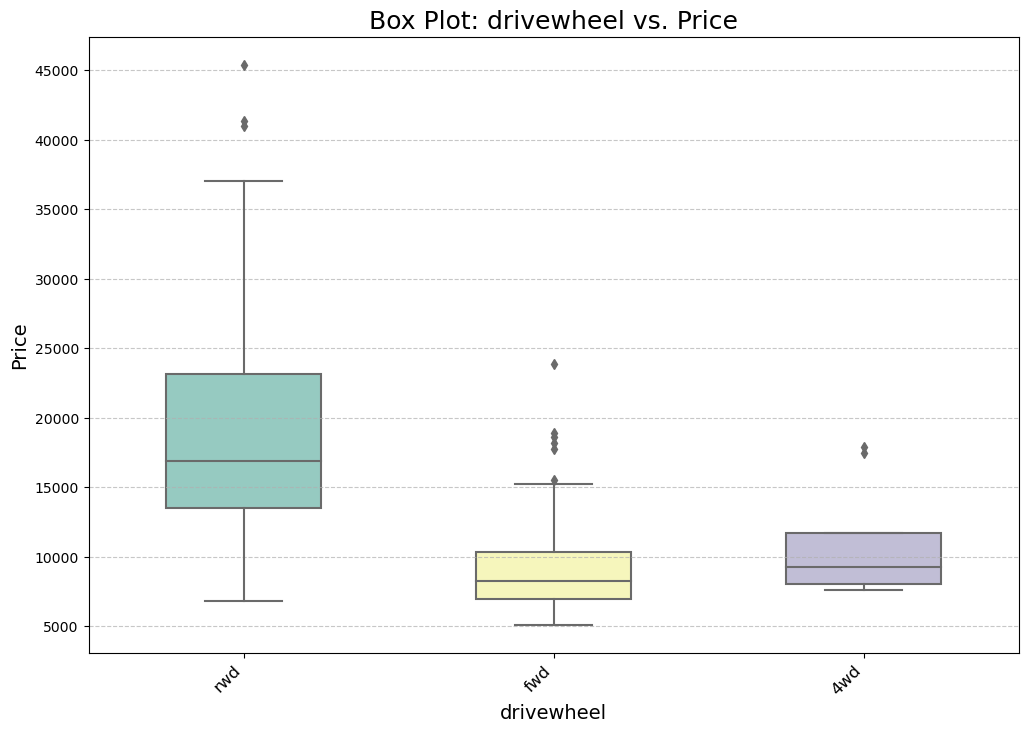

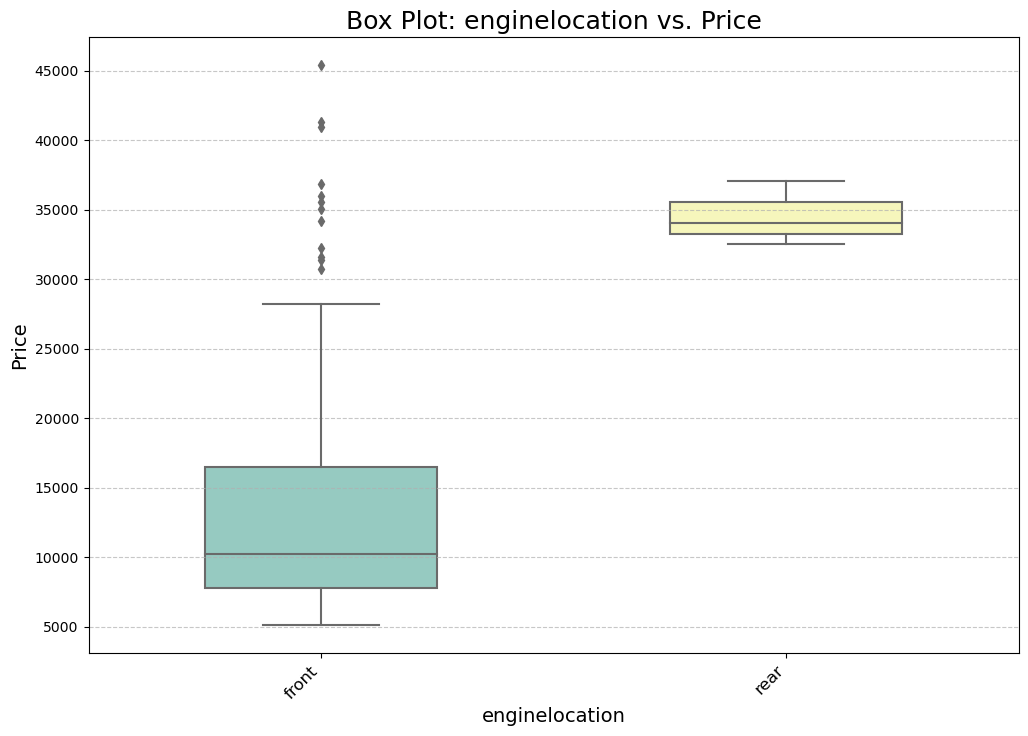

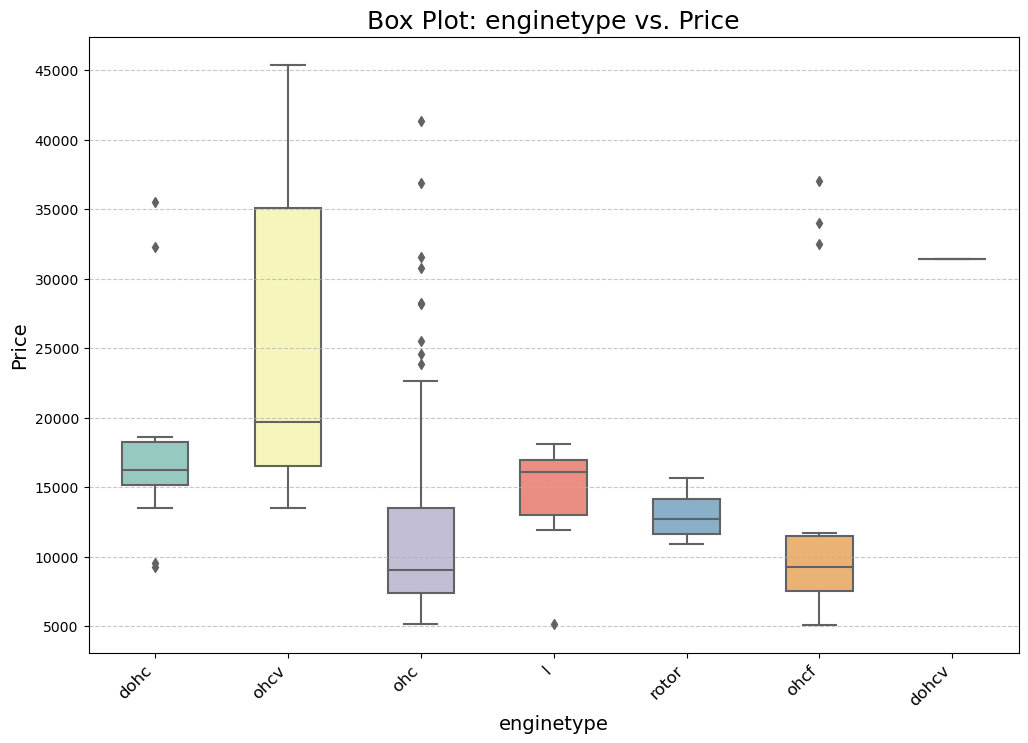

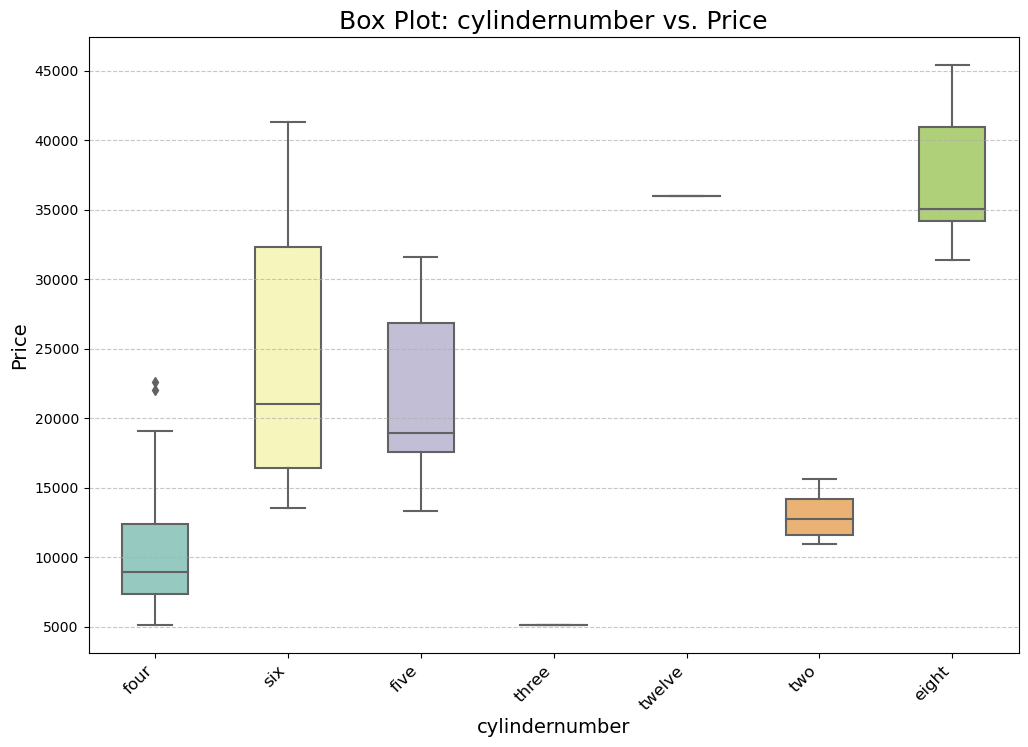

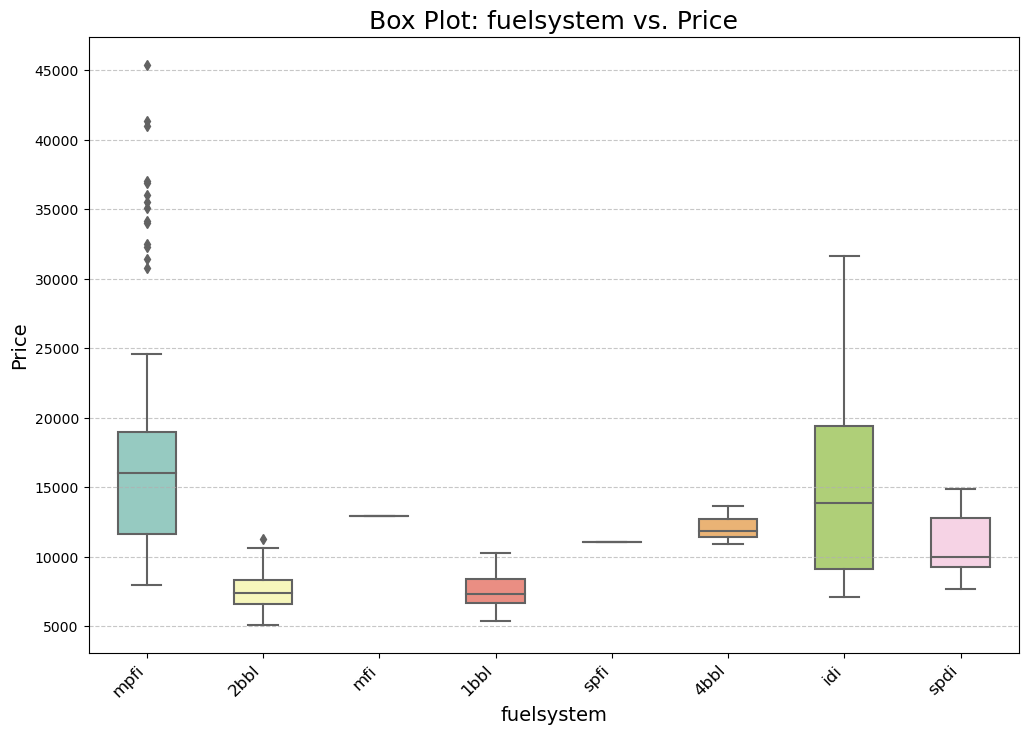

In [16]:
def price_box_plot(column):
    # Set a pleasing color palette
    sns.set_palette("pastel")

    # Create a figure and axes
    plt.figure(figsize=(12, 8))

    # Plot the box plot with adjusted box width and whisker length
    sns.boxplot(x=column, y='price', data=df, width=0.5, fliersize=5, palette="Set3")

    # Add labels and title with increased font size
    plt.title(f'Box Plot: {column} vs. Price', fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Price', fontsize=14)

    # Rotate x-axis labels and adjust font size for better readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add a horizontal grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

# Create box plots for each categorical column
for column in df.select_dtypes(include=['object']).columns.tolist()[1:]:
    price_box_plot(column)

In [17]:
# see the unique values
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [18]:
# create a function to fix the CarName column
def clean_car_name(car_name):
    return car_name.split(" ")[0].lower()
# apply the clean_car_name function to the CarName column
df['CarName'] = df['CarName'].apply(clean_car_name)
# see the unique values after fixing
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
# Fix typing mistakes
df['CarName'] = df['CarName'].str.replace('vw', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('toyouta', 'toyota')
df['CarName'] = df['CarName'].str.replace('maxda', 'mazda')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')

In [20]:
# see the unique values after fixing typing mistakes
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

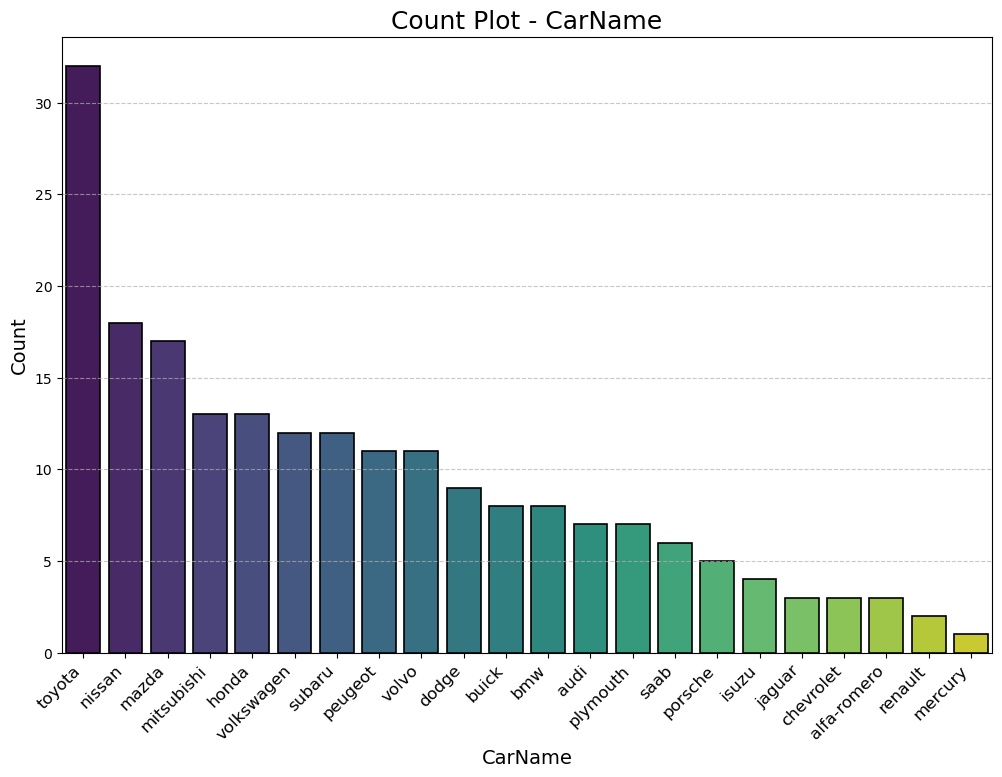

In [21]:
count_plot('CarName')

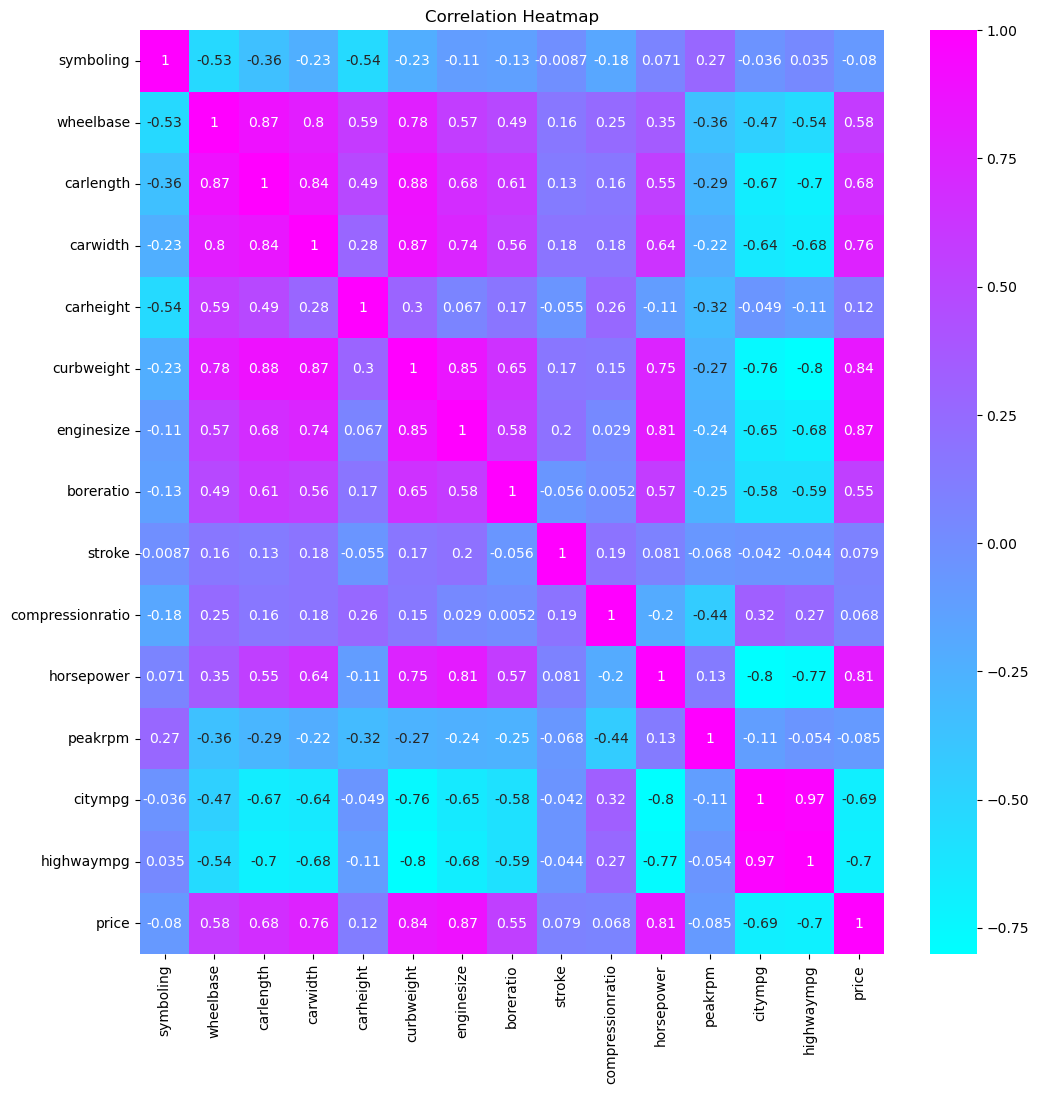

In [22]:
correlation_matrix = df[df.select_dtypes(include=['int64','float64']).columns[1:]].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.title("Correlation Heatmap")
plt.show()

# 4. Data Training

In [23]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [25]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns=numerical_columns[:-1]
print(numerical_columns)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [26]:
X=df.iloc[:, :-1]
y=df['price']

In [27]:
X.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [28]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.preprocessing import MinMaxScaler

# X contains features, y contains target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create transformers for categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Change StandardScaler to MinMaxScaler
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ], 
    remainder='passthrough'  # Include non-transformed columns
)

# Apply transformations to training, validation, and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Get the column names after transformation
transformed_feature_names = preprocessor.get_feature_names_out()
column_names_after_transform = transformed_feature_names.tolist() + X.columns.difference(categorical_columns + numerical_columns).tolist()

# Check the preprocessed DataFrames
print(pd.DataFrame(X_train_preprocessed, columns=column_names_after_transform).head())
print(pd.DataFrame(X_val_preprocessed, columns=column_names_after_transform).head())
print(pd.DataFrame(X_test_preprocessed, columns=column_names_after_transform).head())

   cat__CarName_audi  cat__CarName_bmw  cat__CarName_buick  \
0                0.0               0.0                 0.0   
1                0.0               0.0                 0.0   
2                0.0               0.0                 0.0   
3                1.0               0.0                 0.0   
4                0.0               0.0                 0.0   

   cat__CarName_chevrolet  cat__CarName_dodge  cat__CarName_honda  \
0                     0.0                 0.0                 0.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   

   cat__CarName_isuzu  cat__CarName_jaguar  cat__CarName_mazda  \
0                 0.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2             

In [31]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed, columns=column_names_after_transform)

In [32]:
X_val_preprocessed=pd.DataFrame(X_val_preprocessed, columns=column_names_after_transform)

In [33]:
X_test_preprocessed=pd.DataFrame(X_test_preprocessed, columns=column_names_after_transform)

In [34]:
X_train_preprocessed.head()

,cat__CarName_audi,cat__CarName_bmw,cat__CarName_buick,cat__CarName_chevrolet,cat__CarName_dodge,cat__CarName_honda,cat__CarName_isuzu,cat__CarName_jaguar,cat__CarName_mazda,cat__CarName_mercury,...,num__carheight,num__curbweight,num__enginesize,num__boreratio,num__stroke,num__compressionratio,num__horsepower,num__peakrpm,num__citympg,num__highwaympg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.558333,0.088117,0.128906,0.321429,0.666667,0.93125,0.012712,0.265306,1.00000,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.591667,0.225634,0.203125,0.550000,0.700000,0.10625,0.169492,0.020408,0.50000,0.529412
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.475000,0.091233,0.105469,0.435714,0.580952,0.15000,0.072034,0.428571,0.56250,0.617647
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.441667,0.306186,0.257812,0.464286,0.633333,0.09375,0.245763,0.551020,0.18750,0.264706
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.350000,0.320872,0.296875,0.771429,0.680952,0.14375,0.271186,0.265306,0.34375,0.411765


In [35]:
mean_price = y_train.mean()
mean_price

13367.35294117647

In [36]:
print("MAE for Test Data:",abs(y_test - mean_price).mean())

MAE for Test Data: 5434.986425339366


In [37]:
y_train

90      7099.0
173     8948.0
93      7349.0
5      15250.0
167     8449.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 153, dtype: float64

In [38]:
pd.DataFrame(y_train)

,price
90,7099.0
173,8948.0
93,7349.0
5,15250.0
167,8449.0
...,...
106,18399.0
14,24565.0
92,6849.0
179,15998.0


In [40]:
from sklearn.dummy import DummyRegressor

In [41]:
from keras.layers import Dense, Dropout

In [42]:
from sklearn.metrics import mean_squared_error

# 5. Model Building

Model neural network yang dipergunakan adalah Dense Neural Network (DNN). Dalam jaringan ini setiap neuron di lapisan tertentu    terhubung ke setiap neuron di lapisan berikutnya. DNN umumnya terdiri atas input layer, 1 atau lebih hidden layer dan output layer. Neuron pada satu layer terkoneksi secara penuh dengan layer berikutnya membentuk pola konektifitas yang pada. Secara umum penggunaan DNN digunakan untuk berbagai aplikasi antara lain klasifikasi gambar, pemrosesan bahasa dan regresi.

Sebagai model awal akan digunakan arsitektur yang sederhana lalu dicek performanya, jika belum memuaskan maka akan dilanjutkan dengan menggunakan arsitektur yang lebih kompleks dengan menambahkan neuron dan/atau layer

In [43]:
'''Arsitektur I'''
input_dim = X_train_preprocessed.shape[1]

model = Sequential()
model.add(Dense(25, input_dim=input_dim, activation="relu"))
model.add(Dense(1, activation="linear"))

In [44]:
#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [45]:
#Train the model
history1=model.fit(X_train_preprocessed.values,y_train.values, validation_data=(X_val_preprocessed,y_val),epochs=10,batch_size=64)

Epoch 1/10
3/3 [==============================] - 1s 97ms/step - loss: 13366.6689 - mean_absolute_error: 13366.6689 - val_loss: 14619.7080 - val_mean_absolute_error: 14619.7080
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 13366.4727 - mean_absolute_error: 13366.4727 - val_loss: 14619.5117 - val_mean_absolute_error: 14619.5117
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 13366.2725 - mean_absolute_error: 13366.2725 - val_loss: 14619.3145 - val_mean_absolute_error: 14619.3145
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 13366.0713 - mean_absolute_error: 13366.0713 - val_loss: 14619.1133 - val_mean_absolute_error: 14619.1133
Epoch 5/10
3/3 [==============================] - 0s 8ms/step - loss: 13365.8623 - mean_absolute_error: 13365.8623 - val_loss: 14618.9004 - val_mean_absolute_error: 14618.9004
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 13365.6494 - mean_absolute_error: 13365.6494 -

In [46]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(X_test_preprocessed.values,y_test.values)

print(model.metrics_names)

1/1 [==============================] - 0s 95ms/step - loss: 11396.7949 - mean_absolute_error: 11396.7949
['loss', 'mean_absolute_error']


In [47]:
#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Metric  loss : 11396.79
Metric  mean_absolute_error : 11396.79


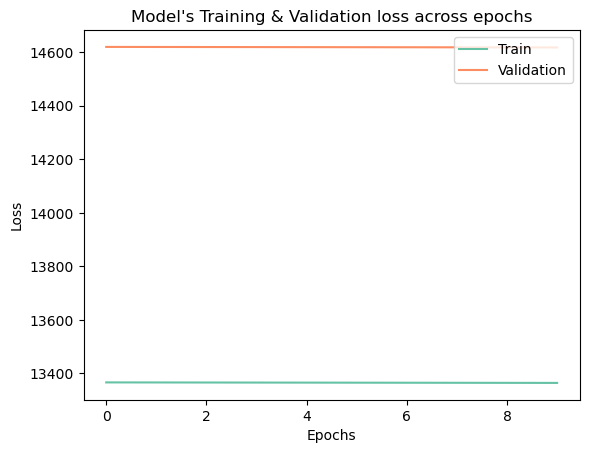

In [48]:
# Plot training and validation loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Selanjutnya model diupgrade dengan menambahkan 2 layer tambahan yang mirroring jumlah neuron pendahulunya
untuk fine tune learning, dilakukan pergantian loss function dari MAE ke MSE

In [49]:
'''Arsitektur II'''

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.95  # Adjust the decay factor as needed

# Create the model
model = Sequential()
model.add(Dense(256, input_dim=input_dim, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mean_absolute_error"])

# Train the model with the learning rate scheduler
history = model.fit(X_train_preprocessed.values, y_train.values, 
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=20, batch_size=64, callbacks=[LearningRateScheduler(lr_scheduler)])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

Epoch 1/20
3/3 [==============================] - 2s 124ms/step - loss: 240741728.0000 - mean_absolute_error: 13367.2373 - val_loss: 308302880.0000 - val_mean_absolute_error: 14620.5098 - lr: 0.0010
Epoch 2/20
3/3 [==============================] - 0s 16ms/step - loss: 240712288.0000 - mean_absolute_error: 13367.3379 - val_loss: 308299040.0000 - val_mean_absolute_error: 14620.4736 - lr: 0.0010
Epoch 3/20
3/3 [==============================] - 0s 19ms/step - loss: 240684848.0000 - mean_absolute_error: 13367.2549 - val_loss: 308295232.0000 - val_mean_absolute_error: 14620.4590 - lr: 0.0010
Epoch 4/20
3/3 [==============================] - 0s 17ms/step - loss: 240667552.0000 - mean_absolute_error: 13367.2500 - val_loss: 308290176.0000 - val_mean_absolute_error: 14620.4336 - lr: 0.0010
Epoch 5/20
3/3 [==============================] - 0s 18ms/step - loss: 240640480.0000 - mean_absolute_error: 13367.1748 - val_loss: 308284128.0000 - val_mean_absolute_error: 14620.4111 - lr: 0.0010
Epoch 6/2

Iterasi berikutnya dengan model yang lebih kompleks

In [50]:
'''Arsitektur III'''

model = Sequential()
model.add(Dense(512, input_dim=input_dim, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="linear"))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mean_absolute_error"])

# Define early stopping to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(X_train_preprocessed.values, y_train.values, 
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=50, batch_size=64, 
                    callbacks=[LearningRateScheduler(lr_scheduler), early_stopping])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed.values, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

Epoch 1/50
3/3 [==============================] - 2s 117ms/step - loss: 240757952.0000 - mean_absolute_error: 13367.3848 - val_loss: 308308096.0000 - val_mean_absolute_error: 14620.5996 - lr: 0.0010
Epoch 2/50
3/3 [==============================] - 0s 22ms/step - loss: 240746336.0000 - mean_absolute_error: 13367.4873 - val_loss: 308304032.0000 - val_mean_absolute_error: 14620.5117 - lr: 0.0010
Epoch 3/50
3/3 [==============================] - 0s 26ms/step - loss: 240733536.0000 - mean_absolute_error: 13367.4326 - val_loss: 308300160.0000 - val_mean_absolute_error: 14620.4385 - lr: 0.0010
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 240716640.0000 - mean_absolute_error: 13367.4082 - val_loss: 308296384.0000 - val_mean_absolute_error: 14620.3799 - lr: 0.0010
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 240702720.0000 - mean_absolute_error: 13367.1611 - val_loss: 308292320.0000 - val_mean_absolute_error: 14620.3193 - lr: 0.0010
Epoch 6/5

3/3 [==============================] - 0s 23ms/step - loss: 240514064.0000 - mean_absolute_error: 13366.1338 - val_loss: 308145600.0000 - val_mean_absolute_error: 14617.9863 - lr: 1.5778e-04
Epoch 42/50
3/3 [==============================] - 0s 21ms/step - loss: 240506864.0000 - mean_absolute_error: 13365.9736 - val_loss: 308142752.0000 - val_mean_absolute_error: 14617.9277 - lr: 1.4989e-04
Epoch 43/50
3/3 [==============================] - 0s 15ms/step - loss: 240510768.0000 - mean_absolute_error: 13366.1191 - val_loss: 308140576.0000 - val_mean_absolute_error: 14617.8867 - lr: 1.4240e-04
Epoch 44/50
3/3 [==============================] - 0s 13ms/step - loss: 240509520.0000 - mean_absolute_error: 13366.2275 - val_loss: 308138400.0000 - val_mean_absolute_error: 14617.8398 - lr: 1.3528e-04
Epoch 45/50
3/3 [==============================] - 0s 16ms/step - loss: 240515120.0000 - mean_absolute_error: 13365.8926 - val_loss: 308135808.0000 - val_mean_absolute_error: 14617.7900 - lr: 1.2851e-

In [51]:
'''Arsitektur IV'''
model = Sequential()
model.add(Dense(512, input_dim=X_train_preprocessed.shape[1], activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="linear"))

# Compile the model with a lower learning rate and L2 regularization
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss="mean_squared_error", 
              metrics=["mean_absolute_error"])

# Define early stopping to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(X_train_preprocessed, y_train, 
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=100, batch_size=64, 
                    callbacks=[early_stopping])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

Epoch 1/100
3/3 [==============================] - 2s 106ms/step - loss: 240760208.0000 - mean_absolute_error: 13367.4180 - val_loss: 308306176.0000 - val_mean_absolute_error: 14620.4697
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 240754320.0000 - mean_absolute_error: 13367.3887 - val_loss: 308306400.0000 - val_mean_absolute_error: 14620.4863
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 240752656.0000 - mean_absolute_error: 13367.3154 - val_loss: 308306400.0000 - val_mean_absolute_error: 14620.4961
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 240751264.0000 - mean_absolute_error: 13367.3721 - val_loss: 308306432.0000 - val_mean_absolute_error: 14620.5107
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 240749728.0000 - mean_absolute_error: 13367.3027 - val_loss: 308306432.0000 - val_mean_absolute_error: 14620.5254
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - los

Epoch 45/100
3/3 [==============================] - 0s 29ms/step - loss: 240679088.0000 - mean_absolute_error: 13367.0137 - val_loss: 308282560.0000 - val_mean_absolute_error: 14620.3027
Epoch 46/100
3/3 [==============================] - 0s 23ms/step - loss: 240674320.0000 - mean_absolute_error: 13366.9990 - val_loss: 308281664.0000 - val_mean_absolute_error: 14620.2959
Epoch 47/100
3/3 [==============================] - 0s 29ms/step - loss: 240680096.0000 - mean_absolute_error: 13367.0928 - val_loss: 308280800.0000 - val_mean_absolute_error: 14620.2930
Epoch 48/100
3/3 [==============================] - 0s 17ms/step - loss: 240679040.0000 - mean_absolute_error: 13367.2070 - val_loss: 308279872.0000 - val_mean_absolute_error: 14620.2881
Epoch 49/100
3/3 [==============================] - 0s 18ms/step - loss: 240682944.0000 - mean_absolute_error: 13367.2090 - val_loss: 308279008.0000 - val_mean_absolute_error: 14620.2852
Epoch 50/100
3/3 [==============================] - 0s 24ms/step 

Epoch 89/100
3/3 [==============================] - 0s 25ms/step - loss: 240626288.0000 - mean_absolute_error: 13366.9834 - val_loss: 308220640.0000 - val_mean_absolute_error: 14620.0986
Epoch 90/100
3/3 [==============================] - 0s 19ms/step - loss: 240608256.0000 - mean_absolute_error: 13366.6875 - val_loss: 308218400.0000 - val_mean_absolute_error: 14620.0850
Epoch 91/100
3/3 [==============================] - 0s 16ms/step - loss: 240621040.0000 - mean_absolute_error: 13366.9268 - val_loss: 308216960.0000 - val_mean_absolute_error: 14620.0957
Epoch 92/100
3/3 [==============================] - 0s 23ms/step - loss: 240615744.0000 - mean_absolute_error: 13366.8789 - val_loss: 308215360.0000 - val_mean_absolute_error: 14620.1074
Epoch 93/100
3/3 [==============================] - 0s 27ms/step - loss: 240622272.0000 - mean_absolute_error: 13366.9170 - val_loss: 308214144.0000 - val_mean_absolute_error: 14620.1309
Epoch 94/100
3/3 [==============================] - 0s 33ms/step 

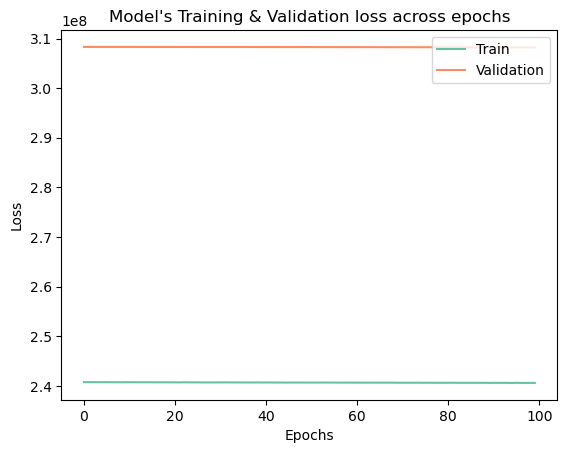

In [52]:
import matplotlib.pyplot as plt

# Assuming 'history' is available after training the model

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Selanjutnya kita tambahkan regularisasi

In [53]:
'''Arsitektur V'''
from tensorflow.keras.regularizers import l2

# Create a more complex model with L2 regularization
model = Sequential()
model.add(Dense(512, input_dim=X_train_preprocessed.shape[1], activation="relu", kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="linear"))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss="mean_squared_error", 
              metrics=["mean_absolute_error"])

# Define early stopping to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(X_train_preprocessed, y_train, 
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=100, batch_size=64, 
                    callbacks=[early_stopping])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

Epoch 1/100
3/3 [==============================] - 2s 109ms/step - loss: 240750000.0000 - mean_absolute_error: 13367.3174 - val_loss: 308312000.0000 - val_mean_absolute_error: 14620.7178
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 240759568.0000 - mean_absolute_error: 13367.4268 - val_loss: 308310048.0000 - val_mean_absolute_error: 14620.6514
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 240753296.0000 - mean_absolute_error: 13367.4375 - val_loss: 308308320.0000 - val_mean_absolute_error: 14620.5957
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 240750720.0000 - mean_absolute_error: 13367.3535 - val_loss: 308306656.0000 - val_mean_absolute_error: 14620.5430
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 240748416.0000 - mean_absolute_error: 13367.3125 - val_loss: 308305216.0000 - val_mean_absolute_error: 14620.4980
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - los

Epoch 45/100
3/3 [==============================] - 0s 18ms/step - loss: 240695008.0000 - mean_absolute_error: 13367.2939 - val_loss: 308282656.0000 - val_mean_absolute_error: 14620.2988
Epoch 46/100
3/3 [==============================] - 0s 20ms/step - loss: 240693776.0000 - mean_absolute_error: 13367.2168 - val_loss: 308281696.0000 - val_mean_absolute_error: 14620.2930
Epoch 47/100
3/3 [==============================] - 0s 31ms/step - loss: 240693296.0000 - mean_absolute_error: 13367.1602 - val_loss: 308280864.0000 - val_mean_absolute_error: 14620.2910
Epoch 48/100
3/3 [==============================] - 0s 27ms/step - loss: 240686960.0000 - mean_absolute_error: 13367.1162 - val_loss: 308279936.0000 - val_mean_absolute_error: 14620.2871
Epoch 49/100
3/3 [==============================] - 0s 24ms/step - loss: 240687680.0000 - mean_absolute_error: 13367.0967 - val_loss: 308278944.0000 - val_mean_absolute_error: 14620.2832
Epoch 50/100
3/3 [==============================] - 0s 17ms/step 

Epoch 89/100
3/3 [==============================] - 0s 31ms/step - loss: 240630064.0000 - mean_absolute_error: 13367.0254 - val_loss: 308210592.0000 - val_mean_absolute_error: 14619.7080
Epoch 90/100
3/3 [==============================] - 0s 25ms/step - loss: 240636688.0000 - mean_absolute_error: 13366.8379 - val_loss: 308208768.0000 - val_mean_absolute_error: 14619.7021
Epoch 91/100
3/3 [==============================] - 0s 33ms/step - loss: 240636736.0000 - mean_absolute_error: 13367.0605 - val_loss: 308206880.0000 - val_mean_absolute_error: 14619.6982
Epoch 92/100
3/3 [==============================] - 0s 19ms/step - loss: 240627312.0000 - mean_absolute_error: 13366.7930 - val_loss: 308205408.0000 - val_mean_absolute_error: 14619.7021
Epoch 93/100
3/3 [==============================] - 0s 18ms/step - loss: 240621200.0000 - mean_absolute_error: 13366.7656 - val_loss: 308203328.0000 - val_mean_absolute_error: 14619.6914
Epoch 94/100
3/3 [==============================] - 0s 22ms/step 

In [54]:
'''Arsitektur VI'''

from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Increase model complexity
model = Sequential()
model.add(Dense(512, input_dim=X_train_preprocessed.shape[1], activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))

# Implement a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)

# Compile the model with the learning rate schedule
model.compile(optimizer=optimizer, 
              loss="mean_squared_error", 
              metrics=["mean_absolute_error"])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_preprocessed, y_train, 
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=100, batch_size=64, 
                    callbacks=[early_stopping])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

Epoch 1/100
3/3 [==============================] - 1s 87ms/step - loss: 240743600.0000 - mean_absolute_error: 13367.0000 - val_loss: 308262336.0000 - val_mean_absolute_error: 14619.0225
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 240696976.0000 - mean_absolute_error: 13365.3223 - val_loss: 308197088.0000 - val_mean_absolute_error: 14616.8320
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 240630688.0000 - mean_absolute_error: 13362.7627 - val_loss: 308081088.0000 - val_mean_absolute_error: 14612.9648
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 240505904.0000 - mean_absolute_error: 13358.2422 - val_loss: 307880960.0000 - val_mean_absolute_error: 14606.2979
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 240296384.0000 - mean_absolute_error: 13350.5977 - val_loss: 307552864.0000 - val_mean_absolute_error: 14595.3740
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss

3/3 [==============================] - 0s 17ms/step - loss: 25593752.0000 - mean_absolute_error: 3626.6650 - val_loss: 41042796.0000 - val_mean_absolute_error: 4061.5884
Epoch 46/100
3/3 [==============================] - 0s 12ms/step - loss: 24361602.0000 - mean_absolute_error: 3518.2458 - val_loss: 39815080.0000 - val_mean_absolute_error: 3939.5786
Epoch 47/100
3/3 [==============================] - 0s 19ms/step - loss: 23239122.0000 - mean_absolute_error: 3401.4521 - val_loss: 38500228.0000 - val_mean_absolute_error: 3838.6455
Epoch 48/100
3/3 [==============================] - 0s 17ms/step - loss: 22242036.0000 - mean_absolute_error: 3306.6257 - val_loss: 37235084.0000 - val_mean_absolute_error: 3737.7095
Epoch 49/100
3/3 [==============================] - 0s 25ms/step - loss: 21200612.0000 - mean_absolute_error: 3193.9702 - val_loss: 36294344.0000 - val_mean_absolute_error: 3623.6797
Epoch 50/100
3/3 [==============================] - 0s 15ms/step - loss: 20228790.0000 - mean_abso

Epoch 90/100
3/3 [==============================] - 0s 17ms/step - loss: 7038803.0000 - mean_absolute_error: 1884.9099 - val_loss: 17279108.0000 - val_mean_absolute_error: 2866.6904
Epoch 91/100
3/3 [==============================] - 0s 13ms/step - loss: 6928934.0000 - mean_absolute_error: 1872.7100 - val_loss: 17217362.0000 - val_mean_absolute_error: 2869.2332
Epoch 92/100
3/3 [==============================] - 0s 16ms/step - loss: 6836598.5000 - mean_absolute_error: 1860.7959 - val_loss: 16999272.0000 - val_mean_absolute_error: 2862.1982
Epoch 93/100
3/3 [==============================] - 0s 17ms/step - loss: 6722543.0000 - mean_absolute_error: 1846.7776 - val_loss: 16669324.0000 - val_mean_absolute_error: 2849.2502
Epoch 94/100
3/3 [==============================] - 0s 17ms/step - loss: 6620228.0000 - mean_absolute_error: 1832.4087 - val_loss: 16455184.0000 - val_mean_absolute_error: 2842.1812
Epoch 95/100
3/3 [==============================] - 0s 18ms/step - loss: 6529904.5000 - me

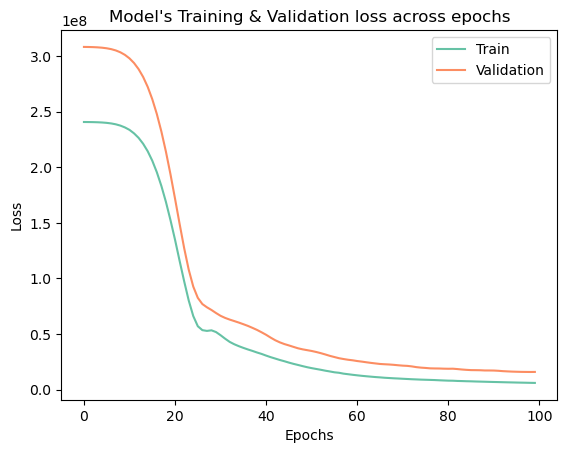

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Berikutnya kita bandingkan hasil jika menggunakan model Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a RandomForestRegressor for comparison
rf_model = RandomForestRegressor()
rf_model.fit(X_train_preprocessed, y_train)

# Evaluate RandomForestRegressor on the test set
rf_predictions = rf_model.predict(X_test_preprocessed)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print("RandomForestRegressor Metrics:")
print("MAE:", round(rf_mae, 2))
print("MSE:", round(rf_mse, 2))

# Evaluate the Neural Network on the test set
nn_result = model.evaluate(X_test_preprocessed, y_test)
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(nn_result[i], 2))

RandomForestRegressor Metrics:
MAE: 1408.68
MSE: 4387805.15
1/1 [==============================] - 0s 19ms/step - loss: 6065113.0000 - mean_absolute_error: 2003.4829
Metric loss : 6065113.0
Metric mean_absolute_error : 2003.48


Berikutnya kita melakukan ensembel prediction dengan menggunakan rata-rata dari Neural Network dan Random Forest

In [57]:
'''Ensembel Prediction'''

# Ensemble prediction using average of Neural Network and Random Forest
nn_predictions = model.predict(X_test_preprocessed).flatten()  # Flatten to 1D
ensemble_predictions = (nn_predictions + rf_predictions) / 2


ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

print("Ensemble Metrics:")
print("MAE:", round(ensemble_mae, 2))
print("MSE:", round(ensemble_mse, 2))

1/1 [==============================] - 0s 79ms/step
Ensemble Metrics:
MAE: 1228.42
MSE: 2934382.21


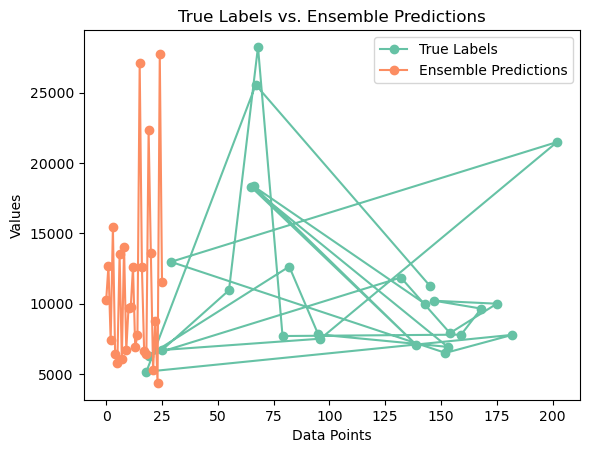

In [58]:
plt.plot(y_test, label='True Labels', marker='o')
plt.plot(ensemble_predictions, label='Ensemble Predictions', marker='o')

plt.title('True Labels vs. Ensemble Predictions')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [59]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 100
        self.horizontal_distance_between_neurons = 4
        self.neuron_radius = 0.2
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

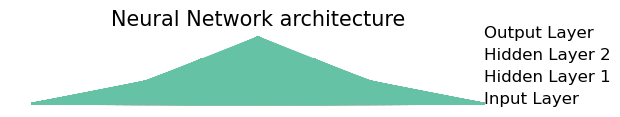

In [60]:
network = DrawNN( [512,256,128,1] )
network.draw()